In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from random import uniform, seed
from math import sqrt
from dataclasses import dataclass

In [2]:
@dataclass
class Agent:
    AgentID: int
    Color: str 
    Happy: int 
    x_loc: float
    y_loc: float
    bias: float
    neighbors: []

In [3]:
def findNeighborDistances(Agent_Array):
    for i in range(0, len(Agent_Array)):
        Agent_Array[i].neighbors.clear()
        for j in range(0, len(Agent_Array)):
            Agent_Array[i].neighbors.append((Agent_Array[j].AgentID, sqrt((Agent_Array[i].x_loc-Agent_Array[j].x_loc)**2+(Agent_Array[i].y_loc-Agent_Array[j].y_loc)**2)))

In [4]:
def assignHappiness(Agent_Array, k):
    for i in range(0, len(Agent_Array)):
        closestNeighbors = sorted(Agent_Array[i].neighbors, key = lambda x: x[1])[1:(k+1)]
        matchedNeighbors = 0
        AgentColor = Agent_Array[i].Color
        for j in range(0, len(closestNeighbors)):
            neighborID = closestNeighbors[j][0]
            for Agent in Agent_Array:
                if Agent.AgentID == neighborID:
                    if Agent.Color==AgentColor:
                        matchedNeighbors = matchedNeighbors + 1
        if(matchedNeighbors/k >= Agent_Array[i].bias):
            Agent_Array[i].Happy = 1
        else:
            Agent_Array[i].Happy = 0

In [5]:
def decideWhoMoves(Agent_Array):
    N = len(Agent_Array)
    for i in range(0, N):
        if(Agent_Array[i].Happy == 0):
            Agent_Array[i].x_loc=uniform(0, 1)
            Agent_Array[i].y_loc=uniform(0, 1)

In [47]:
def plotNeighborhood(Agent_Array):
    df = pd.DataFrame( columns=['x_loc', 'y_loc', 'color', 'bias'])
    i=0
    for Agent in Agent_Array:
        df.loc[i] = [Agent.x_loc, Agent.y_loc, Agent.Color, Agent.bias]
        i = i+1
    sns.scatterplot(data = df, x="x_loc", y="y_loc", hue = "color", style="bias")
    plt.show()

In [33]:
def checkHappiness(Agent_Array, plots):
    NumHappy = 0
    for Agent in Agent_Array:
        if Agent.Happy == 1:
            NumHappy = NumHappy+1
    if(plots == True):
        print("Percent of happy agents: ", 100*NumHappy/len(Agent_Array), "% \n")
    return 100*NumHappy/len(Agent_Array)

In [34]:
def runSim(Agent_Array, steps, k, plots):
    if(plots == True):
        print("Iteration 0: \n")
        plotNeighborhood(Agent_Array)
    percHappyVec = []
    for i in range(0, steps):
        findNeighborDistances(Agent_Array)
        assignHappiness(Agent_Array, k)
        decideWhoMoves(Agent_Array)
        if(plots == True):
            print("Iteration ", i+1, " : \n")
        percHappy = checkHappiness(Agent_Array, plots)
        percHappyVec.append(percHappy)
        if(plots == True):
            plotNeighborhood(Agent_Array)
    return percHappyVec

In [35]:
import sys

In [48]:
def setupAndRunSim(steps, k, orangeNum, greenNum, orangeBiases, greenBiases, plots):
    Agent_Array = []
    if(len(orangeBiases) != orangeNum or len(greenBiases) != greenNum):
        sys.exit("Error, bias vector length must match population sizes.") 
    for i in range(0, orangeNum):
        Agent_Array.append(Agent(AgentID=i, Color="orange", Happy=0, x_loc=uniform(0, 1), y_loc=uniform(0, 1), bias=orangeBiases[i], neighbors=[]))
    for i in range(0, greenNum):
        Agent_Array.append(Agent(AgentID=i+250, Color="green", Happy=0, x_loc=uniform(0, 1), y_loc=uniform(0, 1), bias=orangeBiases[i], neighbors=[]))
    finalPercHappyVec = runSim(Agent_Array, steps, k, plots)
    return finalPercHappyVec

# Rejection ABC Calibration

Iteration 0: 



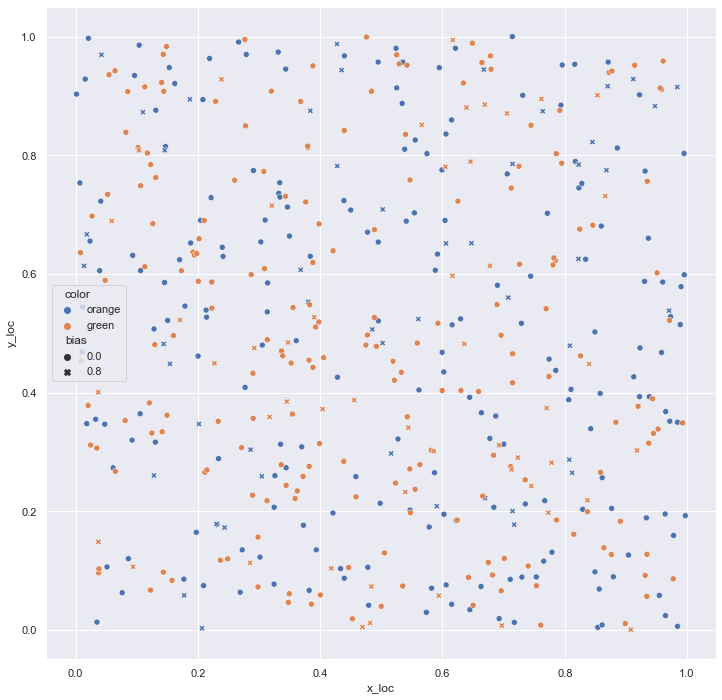

Iteration  1  : 

Percent of happy agents:  81.2 % 



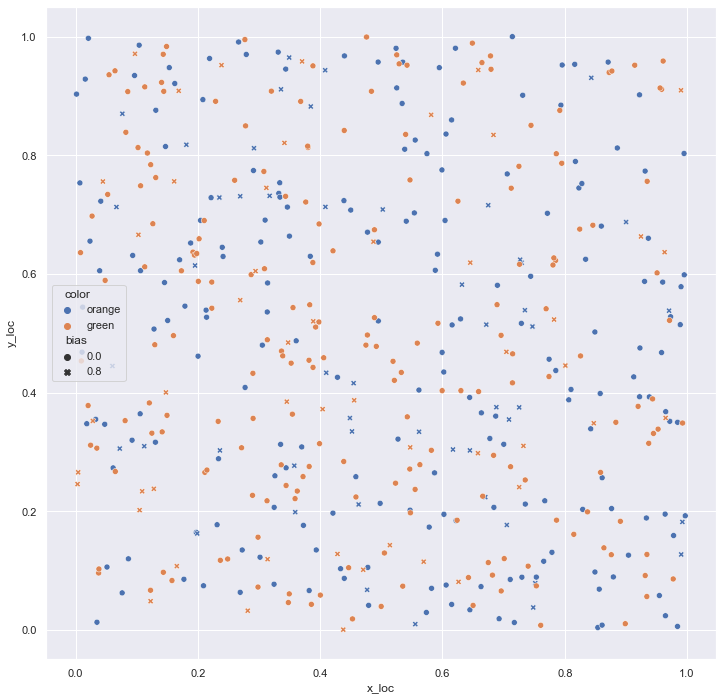

Iteration  2  : 

Percent of happy agents:  80.8 % 



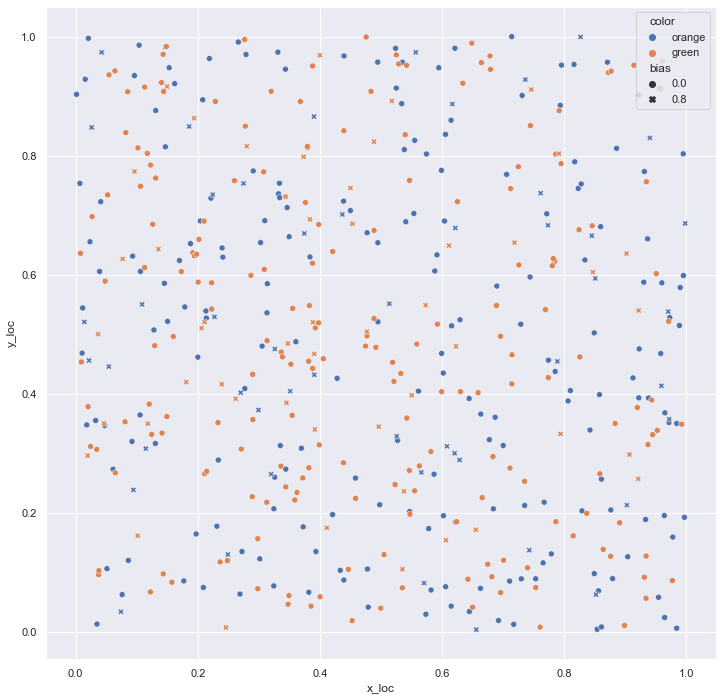

Iteration  3  : 

Percent of happy agents:  80.8 % 



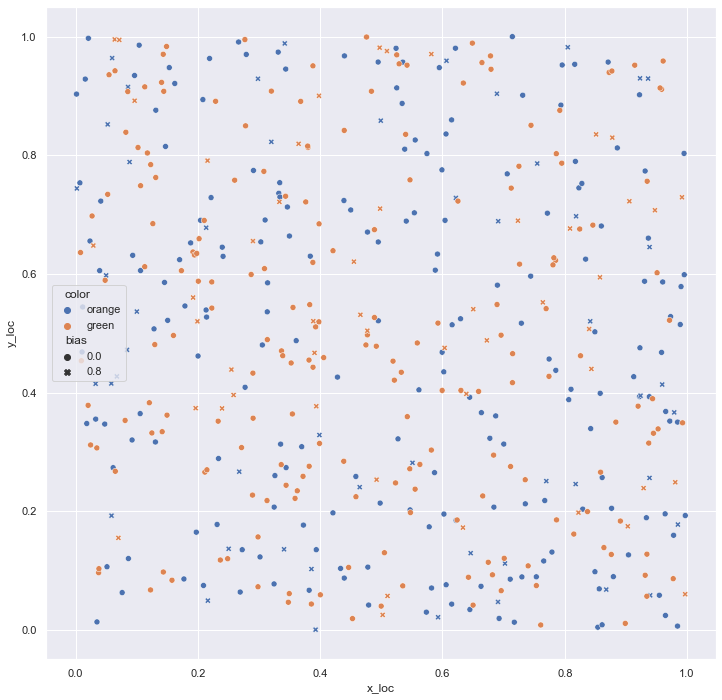

Iteration  4  : 

Percent of happy agents:  81.6 % 



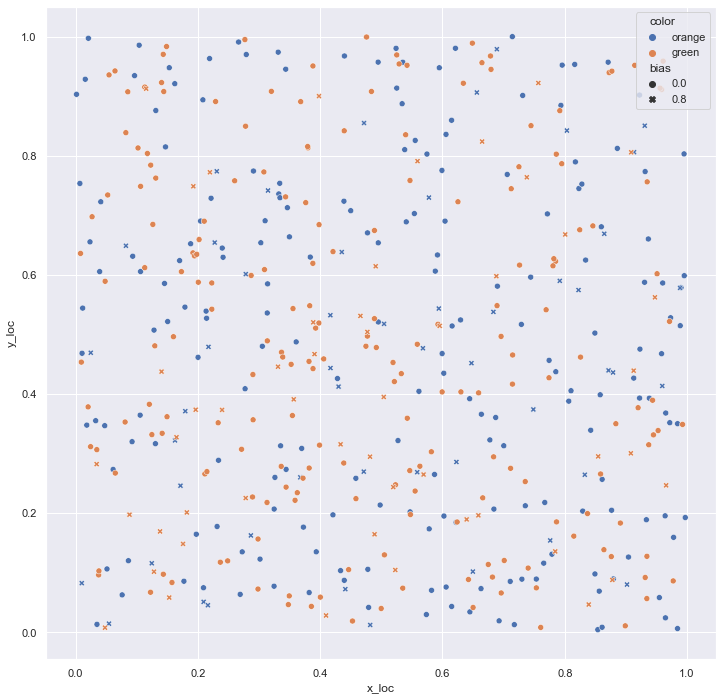

Iteration  5  : 

Percent of happy agents:  81.6 % 



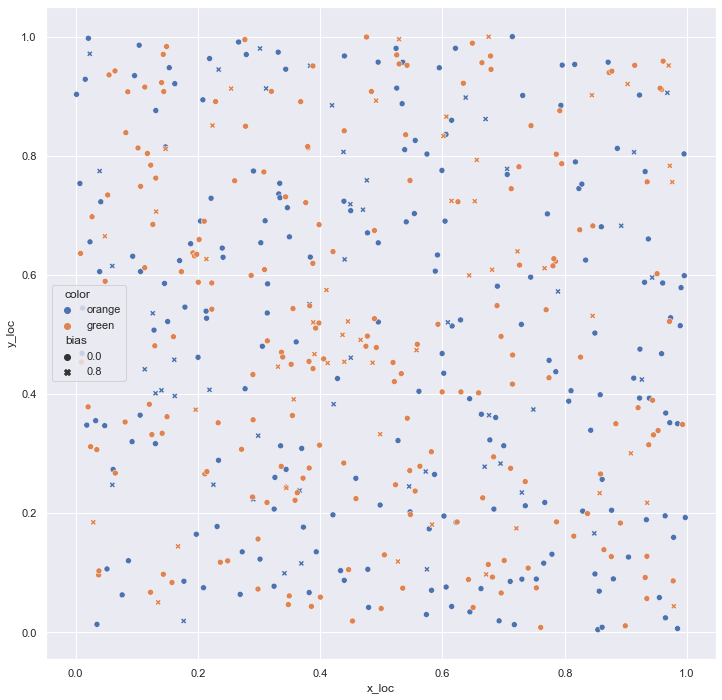

Iteration  6  : 

Percent of happy agents:  83.0 % 



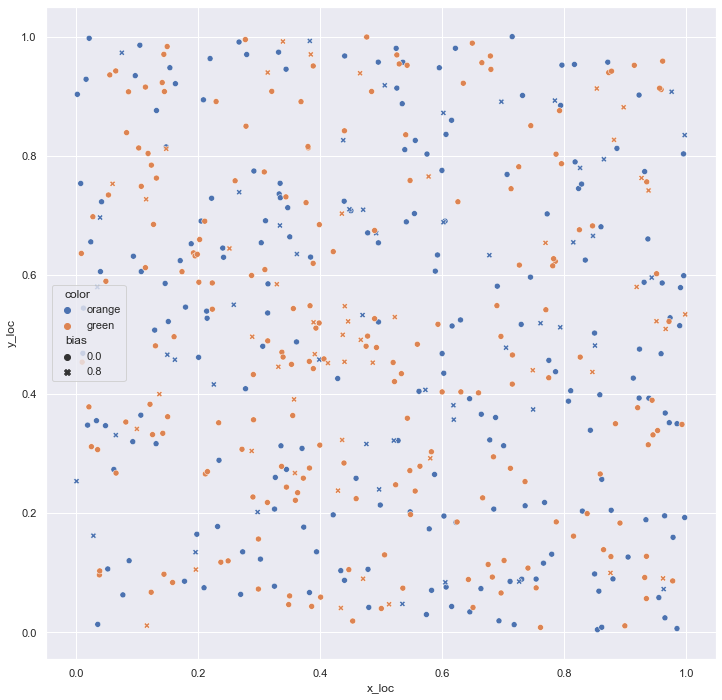

Iteration  7  : 

Percent of happy agents:  83.4 % 



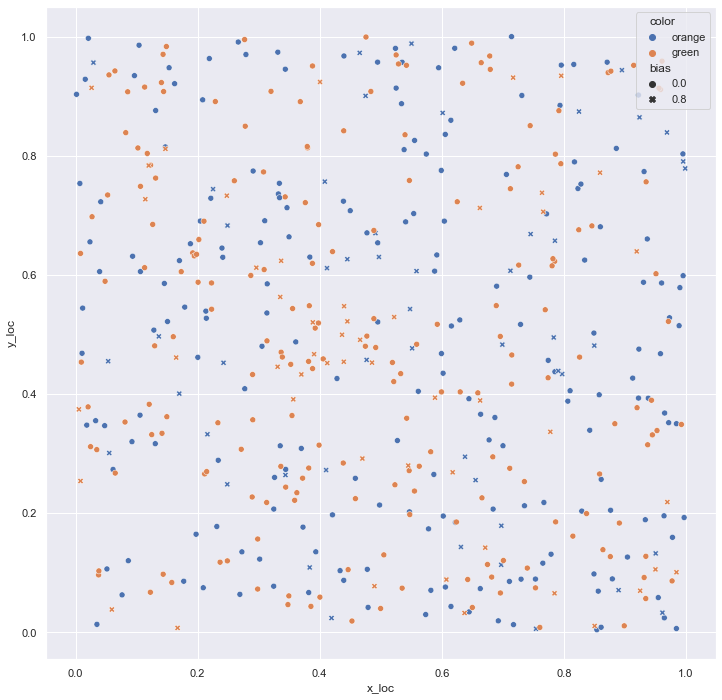

Iteration  8  : 

Percent of happy agents:  84.6 % 



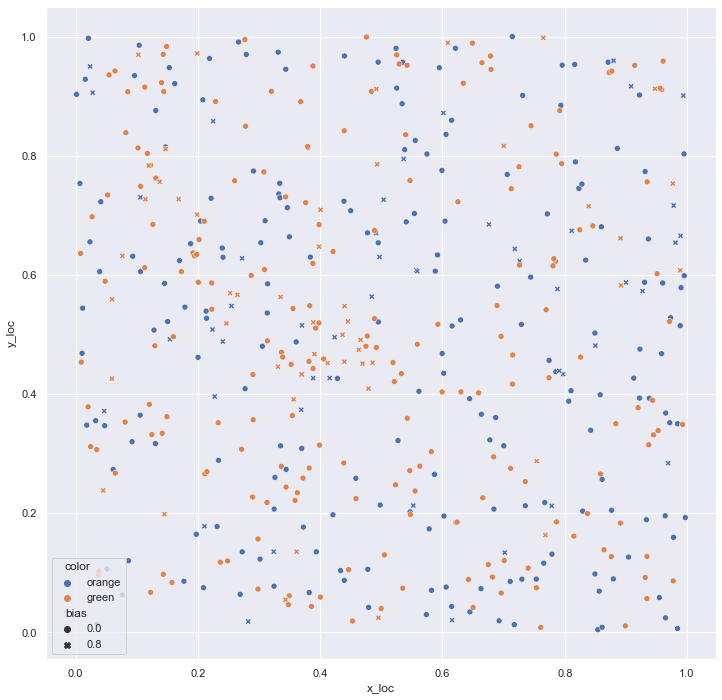

Iteration  9  : 

Percent of happy agents:  83.6 % 



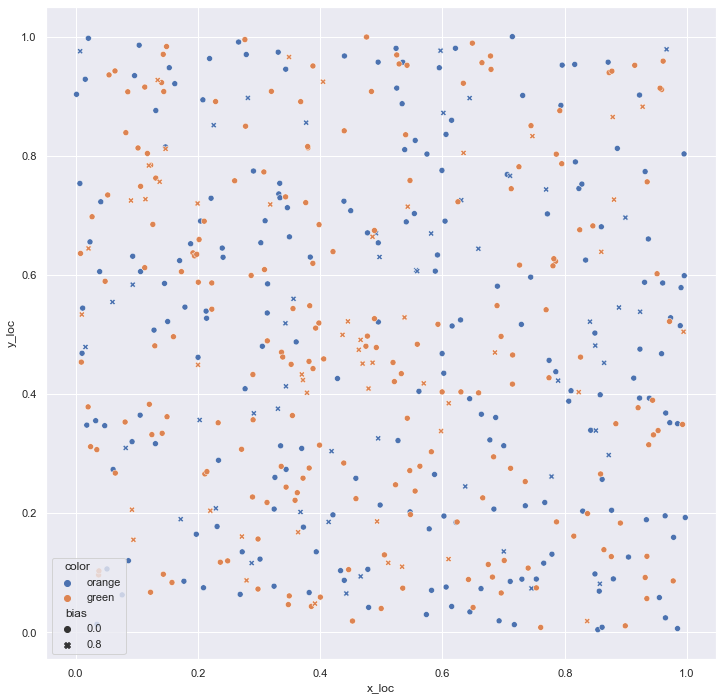

Iteration  10  : 

Percent of happy agents:  84.2 % 



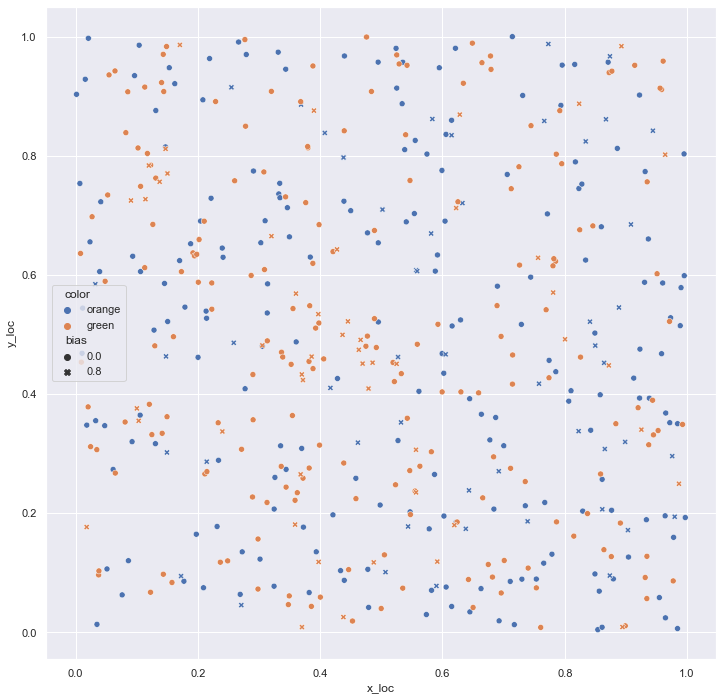

Iteration  11  : 

Percent of happy agents:  84.6 % 



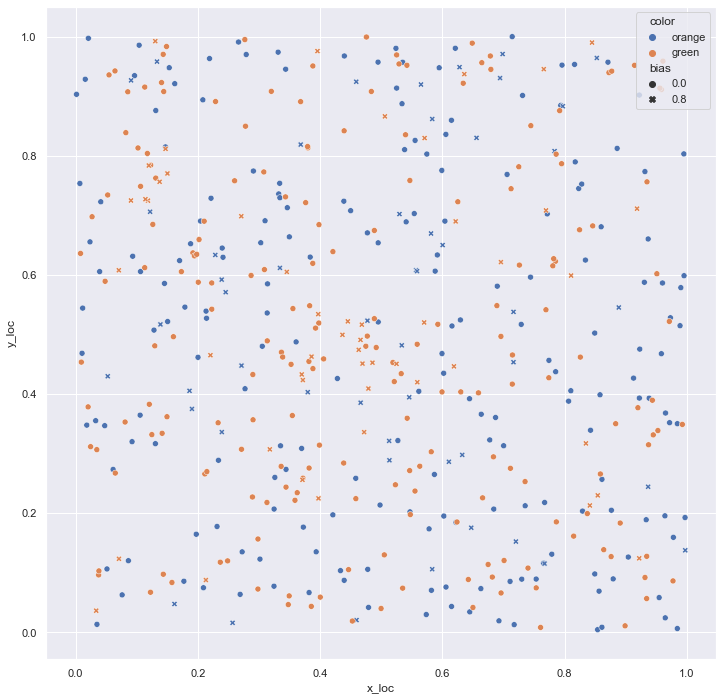

Iteration  12  : 

Percent of happy agents:  84.8 % 



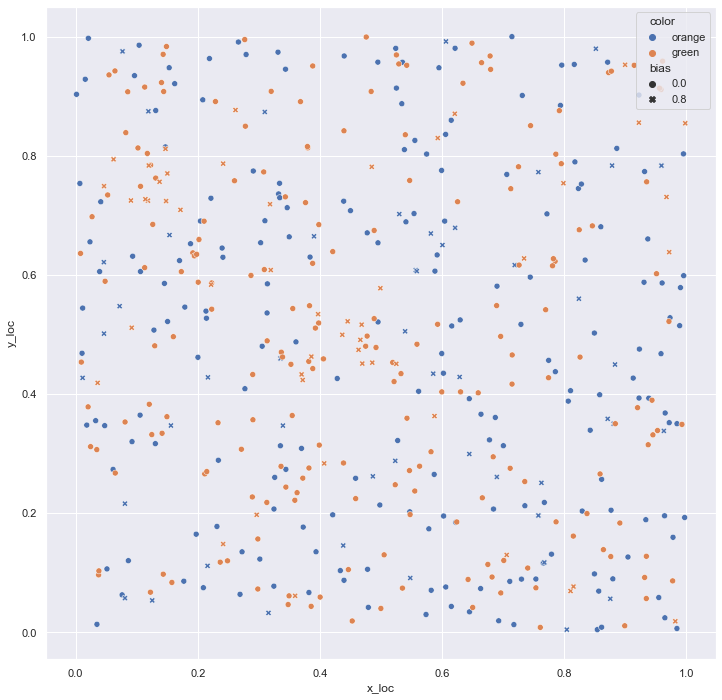

Iteration  13  : 

Percent of happy agents:  85.4 % 



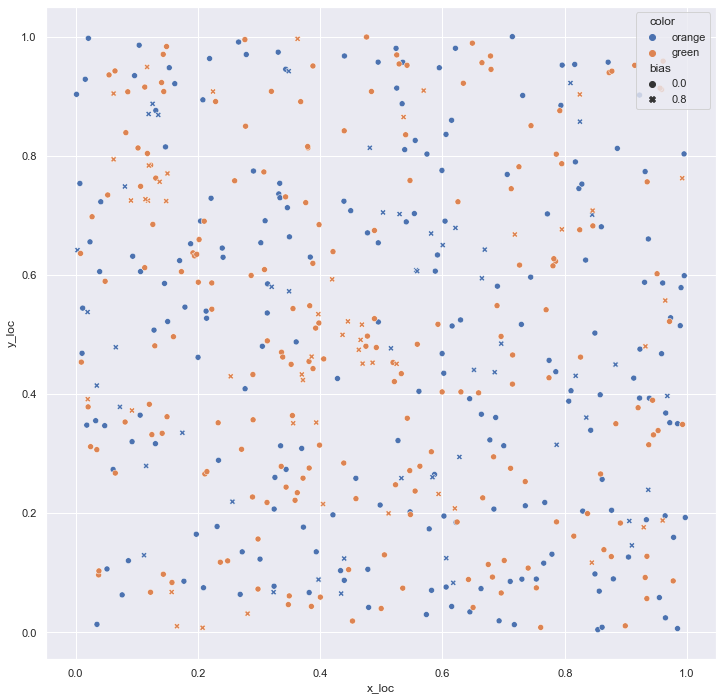

Iteration  14  : 

Percent of happy agents:  86.0 % 



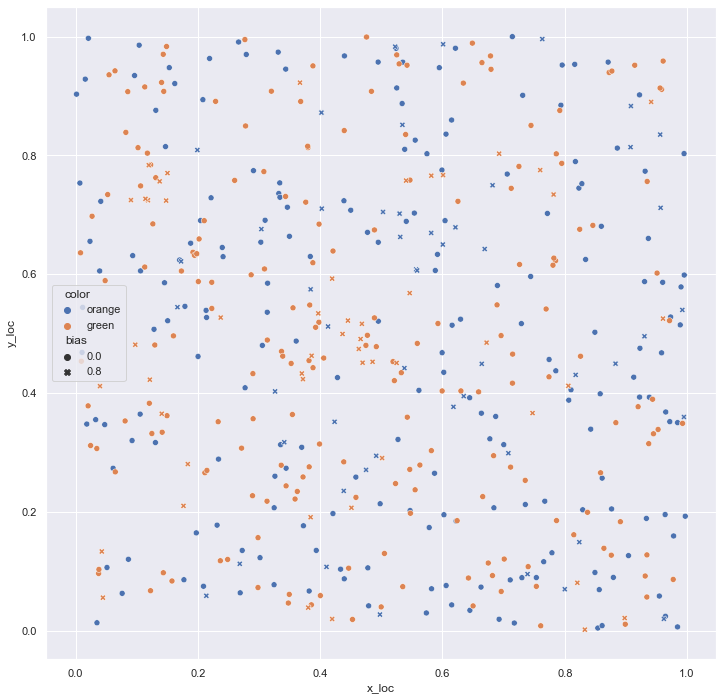

Iteration  15  : 

Percent of happy agents:  86.4 % 



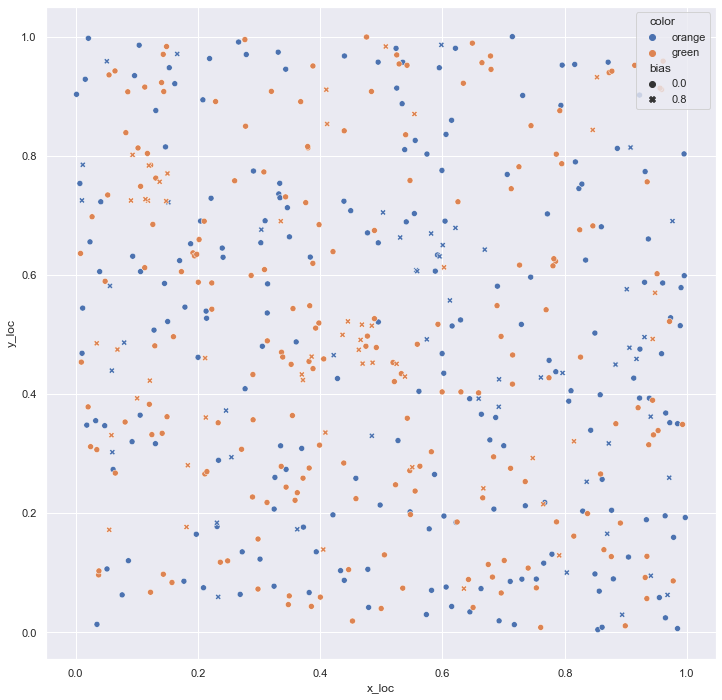

Iteration  16  : 

Percent of happy agents:  87.0 % 



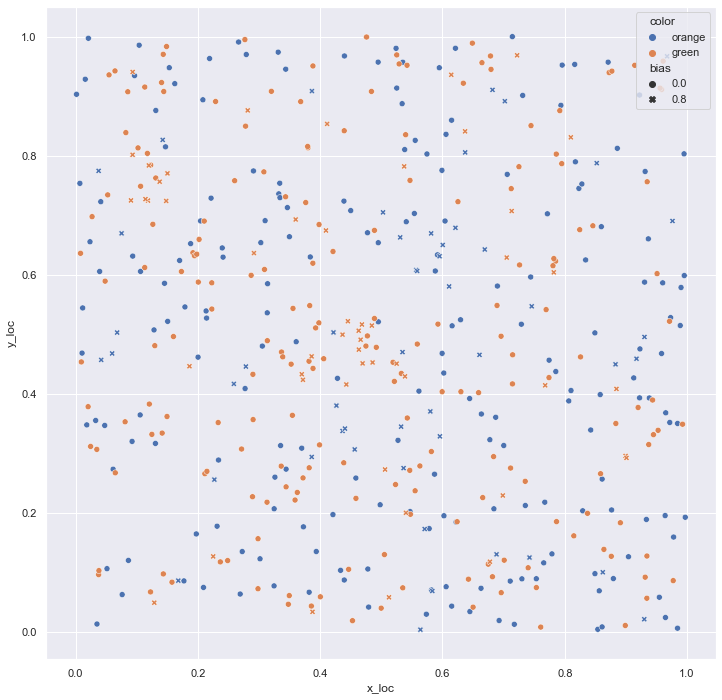

Iteration  17  : 

Percent of happy agents:  86.6 % 



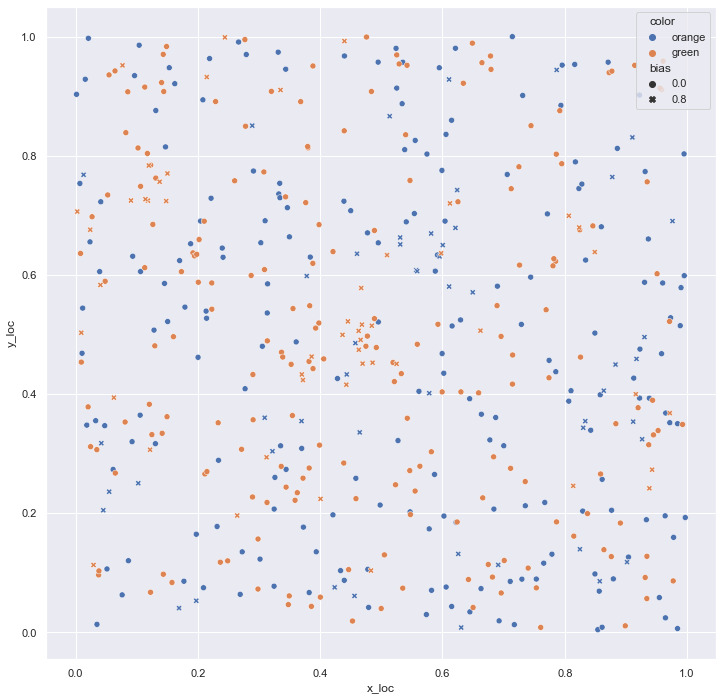

Iteration  18  : 

Percent of happy agents:  86.6 % 



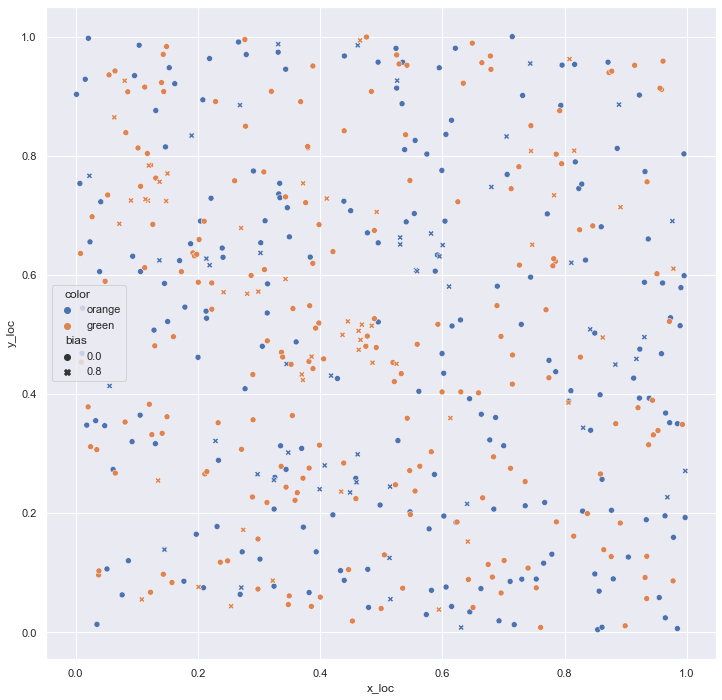

Iteration  19  : 

Percent of happy agents:  85.6 % 



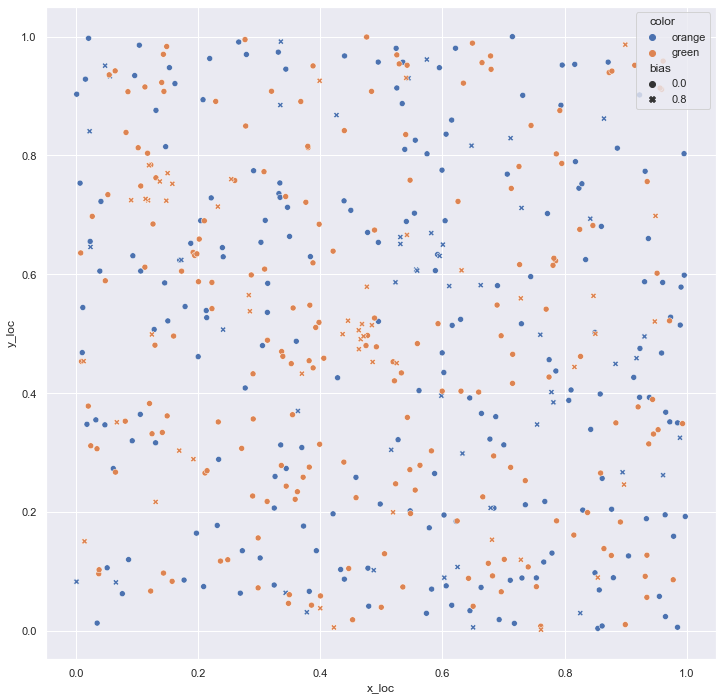

Iteration  20  : 

Percent of happy agents:  85.4 % 



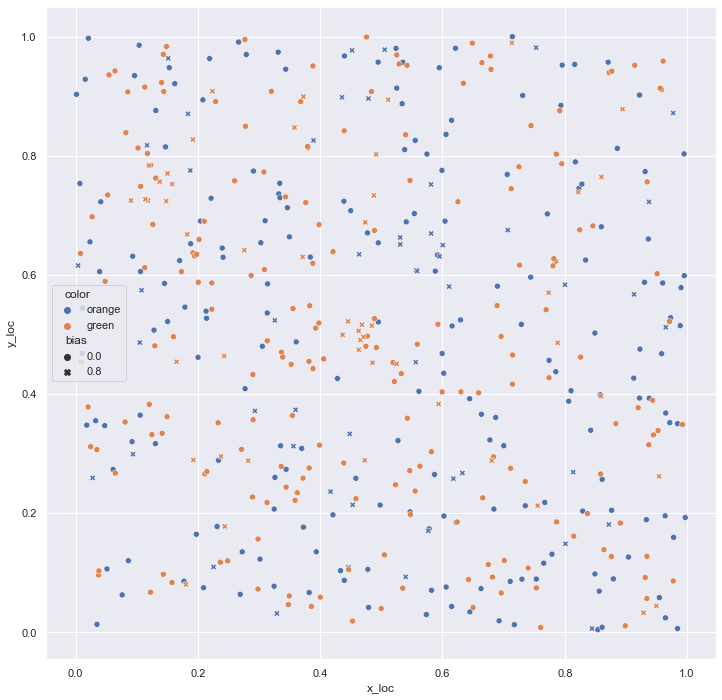

In [53]:
sns.set(rc={'figure.figsize':(12,12)})
x = np.array([0, 0.8])
orangeBiases = np.repeat(x, [200, 50], axis=0)
greenBiases = np.repeat(x, [200, 50], axis=0)
vec = setupAndRunSim(20, 10, 250, 250, orangeBiases, greenBiases, True)

In [13]:
vec

[48.795180722891565,
 52.00803212851405,
 55.82329317269076,
 61.64658634538153,
 65.46184738955823,
 65.46184738955823,
 68.07228915662651,
 69.27710843373494,
 72.89156626506023,
 77.10843373493977]

In [16]:
def rejectABC_Posterior(samples, test_vec, steps, k, orangeNum, greenNum):
    params = []
    dists = []
    for i in range(0, samples):
        print("On simulation ", i+1, " of ", samples, "\n")
        gen_param = uniform(0, 1)
        gen_vec = setupAndRunSim(steps, gen_param, k, orangeNum, greenNum, False)
        dist = np.linalg.norm(np.array(test_vec)-np.array(gen_vec))
        params.append(gen_param)
        dists.append(dist)
    return params, dists        

In [17]:
params, dists = rejectABC_Posterior(1000, vec, 10, 10, 249, 249)

On simulation  1  of  1000 

On simulation  2  of  1000 

On simulation  3  of  1000 

On simulation  4  of  1000 

On simulation  5  of  1000 

On simulation  6  of  1000 

On simulation  7  of  1000 

On simulation  8  of  1000 

On simulation  9  of  1000 

On simulation  10  of  1000 

On simulation  11  of  1000 

On simulation  12  of  1000 

On simulation  13  of  1000 

On simulation  14  of  1000 

On simulation  15  of  1000 

On simulation  16  of  1000 

On simulation  17  of  1000 

On simulation  18  of  1000 

On simulation  19  of  1000 

On simulation  20  of  1000 

On simulation  21  of  1000 

On simulation  22  of  1000 

On simulation  23  of  1000 

On simulation  24  of  1000 

On simulation  25  of  1000 

On simulation  26  of  1000 

On simulation  27  of  1000 

On simulation  28  of  1000 

On simulation  29  of  1000 

On simulation  30  of  1000 

On simulation  31  of  1000 

On simulation  32  of  1000 

On simulation  33  of  1000 

On simulation  34  

KeyboardInterrupt: 

In [16]:
df1 = pd.DataFrame()
df1['param'] = params
df1['dist'] = dists
df1.to_csv('/Users/maria/Desktop/Schelling_ML/ABC_reject_1000sims_51_norm.csv', index=False)

In [17]:
df2 = df1.sort_values(by='dist')

In [18]:
df_top50 = pd.DataFrame({'param': df2.iloc[:50]['param'], "label": "top 50"})
df_top100 = pd.DataFrame({'param': df2.iloc[:100]['param'], "label": "top 100"})
df_top250 = pd.DataFrame({'param': df2.iloc[:250]['param'], "label": "top 250"})
df_top500 = pd.DataFrame({'param': df2.iloc[:500]['param'], "label": "top 500"})
df_top750 = pd.DataFrame({'param': df2.iloc[:750]['param'], "label": "top 750"})
df_top1000 = pd.DataFrame({'param': df2.iloc[:1000]['param'], "label": "top 1000"})

In [21]:
df_formatted = pd.concat([df_top50, df_top100, df_top250, df_top500, df_top750, df_top1000], axis=0, ignore_index=True)

In [23]:
df_formatted

,param,label
0,0.566716,top 50
1,0.525929,top 50
2,0.557697,top 50
3,0.583641,top 50
4,0.540348,top 50
...,...,...
2645,0.912778,top 1000
2646,0.947822,top 1000
2647,0.912835,top 1000
2648,0.969111,top 1000


(0.0, 1.0)

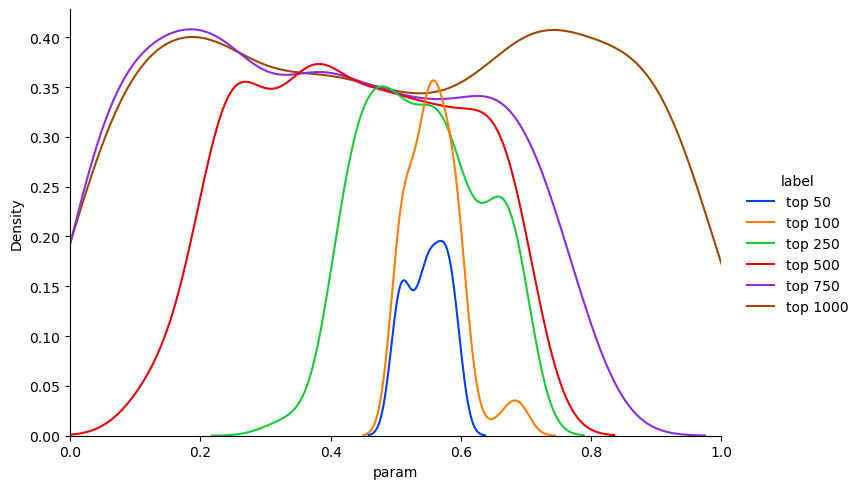

In [30]:
sns.displot(data=df_formatted, x='param', hue='label', kind='kde', fill=False, palette=sns.color_palette('bright')[:6], height=5, aspect=1.5)
plt.xlim(0, 1)

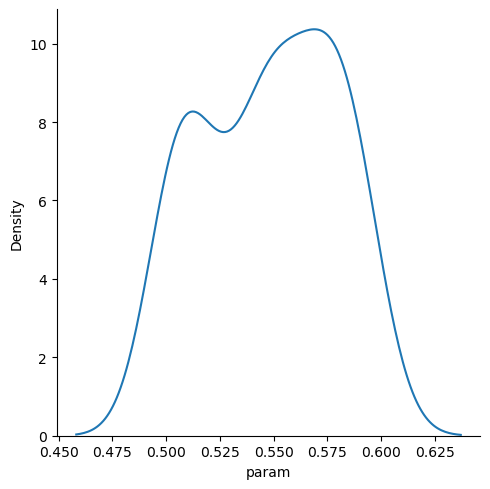

In [24]:
sns.displot(data=df_top50, x='param', kind='kde', fill=False)

# Markov Chain Monte Carlo ABC Calibration

In [10]:
from scipy.stats import truncnorm

In [11]:
observed_vecs = []
for i in range(0, 10):
    vec = setupAndRunSim(10, 0.50, 10, 250, 250, False)
    observed_vecs.append(vec)

In [12]:
def MCMC_ABC_Posterior(samples, observed_vecs, steps, k, orangeNum, greenNum, sigma_start, shrink=True, cont_shrink = True):
    params = []
    dists = []
    rejects = []
    print("On simulation ", 1, " of ", samples, "\n")
    # Make first parameter guess from a uniform prior 
    current_param = uniform(0, 1)
    # Run simulation with guess parameter
    gen_vec = setupAndRunSim(steps, current_param, k, orangeNum, greenNum, False)
    # Add up distances between guess simulation and observed simulations
    dist = 0
    for obs_vec in observed_vecs:
        dist = dist + np.linalg.norm(np.array(obs_vec)-np.array(gen_vec))
    # Get mean distance between guess simulation and observed simulations
    dist = dist/len(observed_vecs)
    # Add current parameter to the accepted params list
    params.append(current_param)
    # Add current distance to the distances list
    dists.append(dist)
    # Since the first guess is automatically accepted, add a placeholder to rejected params list
    rejects.append(None)
    streak = 1
    # Start MCMC simulations
    for i in range(1, samples):
        print("On simulation ", i+1, " of ", samples, "\n")
        lower, upper = 0, 1
        mu = current_param
        # Shrink variance before sampling, if this setting is enabled
        if(shrink==True):
            sigma = sigma_start/streak
        else:
            sigma = sigma_start
        test_param = truncnorm.rvs((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
        gen_vec = setupAndRunSim(steps, test_param, k, orangeNum, greenNum, False)
        dist = 0
        for obs_vec in observed_vecs:
            dist = dist + np.linalg.norm(np.array(obs_vec)-np.array(gen_vec))
        dist = dist/len(observed_vecs)
        if(dist < dists[i-1]):
            params.append(test_param)
            dists.append(dist)
            rejects.append(None)
            current_param = test_param
            if(cont_shrink==True):
                streak = streak+1
            else:
                streak = 1
        else:
            params.append(current_param)
            dists.append(dists[i-1])
            rejects.append(test_param)
            streak = streak+1
    return params, dists, rejects

On simulation  1  of  50 

On simulation  2  of  50 

On simulation  3  of  50 

On simulation  4  of  50 

On simulation  5  of  50 

On simulation  6  of  50 

On simulation  7  of  50 

On simulation  8  of  50 

On simulation  9  of  50 

On simulation  10  of  50 

On simulation  11  of  50 

On simulation  12  of  50 

On simulation  13  of  50 

On simulation  14  of  50 

On simulation  15  of  50 

On simulation  16  of  50 

On simulation  17  of  50 

On simulation  18  of  50 

On simulation  19  of  50 

On simulation  20  of  50 

On simulation  21  of  50 

On simulation  22  of  50 

On simulation  23  of  50 

On simulation  24  of  50 

On simulation  25  of  50 

On simulation  26  of  50 

On simulation  27  of  50 

On simulation  28  of  50 

On simulation  29  of  50 

On simulation  30  of  50 

On simulation  31  of  50 

On simulation  32  of  50 

On simulation  33  of  50 

On simulation  34  of  50 

On simulation  35  of  50 

On simulation  36  of  50 

O

Text(0.5, 1.0, 'No shrinkage and start sigma=0.25')

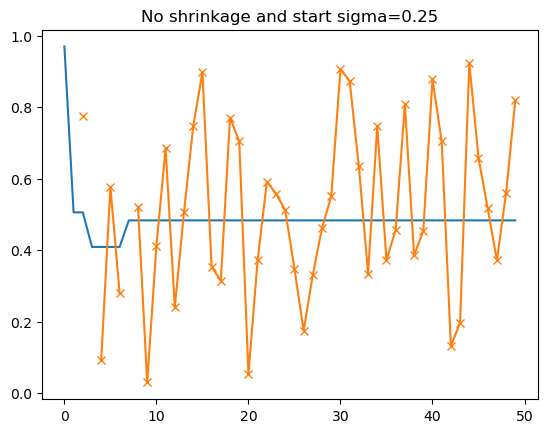

In [13]:
params, dists, rejects = MCMC_ABC_Posterior(50, observed_vecs, 10, 10, 250, 250, 0.25, False, False)
plt.plot(params)
plt.plot(rejects, marker='x')
plt.title("No shrinkage and start sigma=0.25")

On simulation  1  of  50 

On simulation  2  of  50 

On simulation  3  of  50 

On simulation  4  of  50 

On simulation  5  of  50 

On simulation  6  of  50 

On simulation  7  of  50 

On simulation  8  of  50 

On simulation  9  of  50 

On simulation  10  of  50 

On simulation  11  of  50 

On simulation  12  of  50 

On simulation  13  of  50 

On simulation  14  of  50 

On simulation  15  of  50 

On simulation  16  of  50 

On simulation  17  of  50 

On simulation  18  of  50 

On simulation  19  of  50 

On simulation  20  of  50 

On simulation  21  of  50 

On simulation  22  of  50 

On simulation  23  of  50 

On simulation  24  of  50 

On simulation  25  of  50 

On simulation  26  of  50 

On simulation  27  of  50 

On simulation  28  of  50 

On simulation  29  of  50 

On simulation  30  of  50 

On simulation  31  of  50 

On simulation  32  of  50 

On simulation  33  of  50 

On simulation  34  of  50 

On simulation  35  of  50 

On simulation  36  of  50 

O

Text(0.5, 1.0, 'Streak shrinkage and start sigma=0.25')

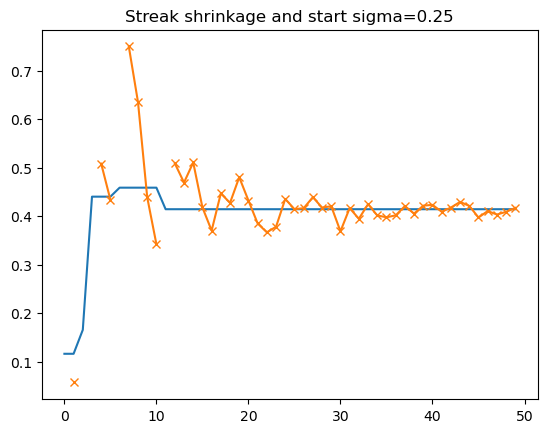

In [14]:
params, dists, rejects = MCMC_ABC_Posterior(50, observed_vecs, 10, 10, 250, 250, 0.25, True, False)
plt.plot(params)
plt.plot(rejects, marker='x')
plt.title("Streak shrinkage and start sigma=0.25")

On simulation  1  of  50 

On simulation  2  of  50 

On simulation  3  of  50 

On simulation  4  of  50 

On simulation  5  of  50 

On simulation  6  of  50 

On simulation  7  of  50 

On simulation  8  of  50 

On simulation  9  of  50 

On simulation  10  of  50 

On simulation  11  of  50 

On simulation  12  of  50 

On simulation  13  of  50 

On simulation  14  of  50 

On simulation  15  of  50 

On simulation  16  of  50 

On simulation  17  of  50 

On simulation  18  of  50 

On simulation  19  of  50 

On simulation  20  of  50 

On simulation  21  of  50 

On simulation  22  of  50 

On simulation  23  of  50 

On simulation  24  of  50 

On simulation  25  of  50 

On simulation  26  of  50 

On simulation  27  of  50 

On simulation  28  of  50 

On simulation  29  of  50 

On simulation  30  of  50 

On simulation  31  of  50 

On simulation  32  of  50 

On simulation  33  of  50 

On simulation  34  of  50 

On simulation  35  of  50 

On simulation  36  of  50 

O

Text(0.5, 1.0, 'Continuous shrinkage and start sigma=0.25')

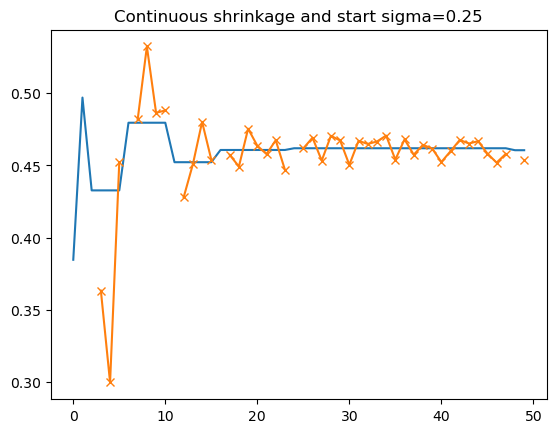

In [15]:
params, dists, rejects = MCMC_ABC_Posterior(50, observed_vecs, 10, 10, 250, 250, 0.25, True, True)
plt.plot(params)
plt.plot(rejects, marker='x')
plt.title("Continuous shrinkage and start sigma=0.25")